<a href="https://colab.research.google.com/github/PMwango/PMwango/blob/main/Data_Exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np


In [10]:
df = pd.read_csv('/content/Loan_prediction_dataset (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2917.5
      Loan_ID  Gender Married Dependents Education Self_Employed  \
9    LP001020    Male     Yes          1  Graduate            No   
34   LP001100    Male      No         3+  Graduate            No   
54   LP001186  Female     Yes          1  Graduate           Yes   
67   LP001233    Male     Yes          1  Graduate            No   
102  LP001350    Male     Yes        NaN  Graduate            No   
106  LP001369    Male     Yes          2  Graduate            No   
115  LP001401    Male     Yes          1  Graduate            No   
119  LP001422  Female      No          0  Graduate            No   
126  LP001448     NaN     Yes         3+  Graduate            No   
128  LP001451    Male     Yes          1  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
9              12841            10968.0       349.0             360.0   
34             12500             3000.0       320.0             360.0   
54             11500     

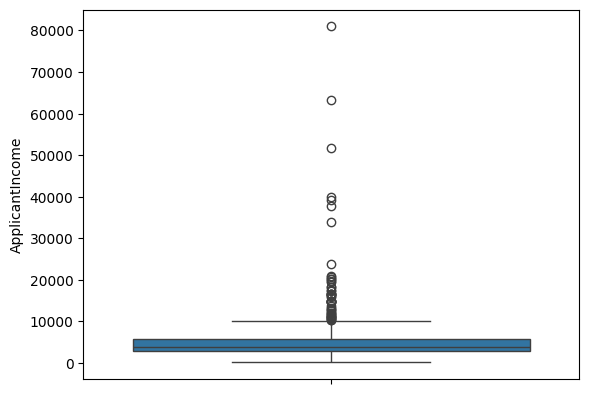

In [17]:

# Checking for null values
# df.dropna(inplace =True)

#Checking for outliers (extreme values)
#  using a box plot
sns.boxplot(df['ApplicantIncome'])

# using the z-score
from scipy import stats
np.abs(stats.zscore(df['ApplicantIncome']))

# using quartile ranges
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#defining the threshold and detecting outliers
threshold = 1.5
outliers = df[(df['ApplicantIncome'] < (Q1 - threshold * IQR)) | (df['ApplicantIncome'] > (Q3 + threshold * IQR))]
# print(outliers)
# print(len(outliers))
df_outliers = pd.DataFrame(outliers)

df_outliers.to_csv('outliers.csv', index=False)
print(df_outliers.head(10))

In [18]:
#Label encoding categorical variables
from sklearn.preprocessing import LabelEncoder
encoded_col = ["Gender","Married", "Education", "Self_Employed", "Loan_Status" ]
le = LabelEncoder()
for col in encoded_col:
  df[col] = le.fit_transform(df[col])

In [20]:
#one hot encoding multicategorical columns
df= pd.get_dummies(df, columns= ["Property_Area"])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,1,False,False,True
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,True
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,True
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,True
